Yusuf Eren Yıldız 21040301031 Yazılım Mühendisliği

ÖĞRETİM GÖREVLİSİ: GÖKALP TULUM 

TOPKAPI ÜNİVERSİTESİ MÜHENDİSLİK FAKÜLTESİ

Kütüphanelerin İçe Aktarımı

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

Verinin Yüklenmesi ve Hazırlanması

In [2]:
data = pd.read_csv('diabetes.csv')

# Bağımsız (X) ve bağımlı (y) değişkenleri ayırın
X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

# Veri setini eğitim ve test seti olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Naif Bayes Sınıflandırıcısının Uygulanması

In [3]:
# Naive Bayes Sınıflandırıcısını Uygulama
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Tahminlerin Yapılması

In [4]:
# Tahmin yapma
y_pred_nb = nb.predict(X_test)
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]

Performans Metrikleri ve Karışıklık Matrisi Hesaplama

In [5]:
# Performans metriklerini hesaplama (Naive Bayes)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix (Naive Bayes):")
print(conf_matrix_nb)

# Sensitivity, Specificity, Accuracy, F1-Score hesaplama (Naive Bayes)
tn_nb, fp_nb, fn_nb, tp_nb = conf_matrix_nb.ravel()

sensitivity_nb = tp_nb / (tp_nb + fn_nb)
specificity_nb = tn_nb / (tn_nb + fp_nb)
accuracy_nb = (tp_nb + tn_nb) / (tp_nb + tn_nb + fp_nb + fn_nb)
f1_score_nb = 2 * tp_nb / (2 * tp_nb + fp_nb + fn_nb)

print(f"Sensitivity (Naive Bayes): {sensitivity_nb}")
print(f"Specificity (Naive Bayes): {specificity_nb}")
print(f"Accuracy (Naive Bayes): {accuracy_nb}")
print(f"F1-Score (Naive Bayes): {f1_score_nb}")

Confusion Matrix (Naive Bayes):
[[119  32]
 [ 27  53]]
Sensitivity (Naive Bayes): 0.6625
Specificity (Naive Bayes): 0.7880794701986755
Accuracy (Naive Bayes): 0.7445887445887446
F1-Score (Naive Bayes): 0.6424242424242425


Naive Bayes ROC Eğrisi

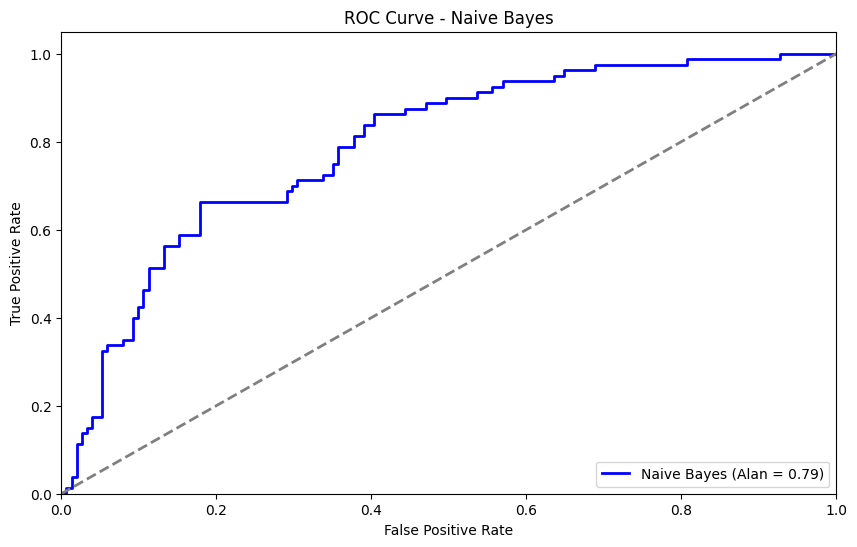

In [6]:
# Naive Bayes ROC eğrisi
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_prob_nb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='Naive Bayes (Alan = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

KNN Sınıflandırıcısının Uygulanması

In [7]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

In [8]:
# En iyi k değerini bulma
best_k = k_range[np.argmax(k_scores)]
print(f"En iyi k değeri: {best_k}")

En iyi k değeri: 11


In [9]:
# En iyi k değeri ile KNN modeli oluşturma
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [10]:
# Test verileri ile tahmin yapma
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

Performans Metrikleri ve Karışıklık Matrisi Hesaplama

In [11]:
# Performans metriklerini hesaplama (KNN)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)

# Sensitivity, Specificity, Accuracy, F1-Score hesaplama (KNN)
tn_knn, fp_knn, fn_knn, tp_knn = conf_matrix_knn.ravel()

sensitivity_knn = tp_knn / (tp_knn + fn_knn)
specificity_knn = tn_knn / (tn_knn + fp_knn)
accuracy_knn = (tp_knn + tn_knn) / (tp_knn + tn_knn + fp_knn + fn_knn)
f1_score_knn = 2 * tp_knn / (2 * tp_knn + fp_knn + fn_knn)

print(f"Sensitivity (KNN): {sensitivity_knn}")
print(f"Specificity (KNN): {specificity_knn}")
print(f"Accuracy (KNN): {accuracy_knn}")
print(f"F1-Score (KNN): {f1_score_knn}")

Confusion Matrix (KNN):
[[123  28]
 [ 34  46]]
Sensitivity (KNN): 0.575
Specificity (KNN): 0.8145695364238411
Accuracy (KNN): 0.7316017316017316
F1-Score (KNN): 0.5974025974025974


KNN ROC eğrisi

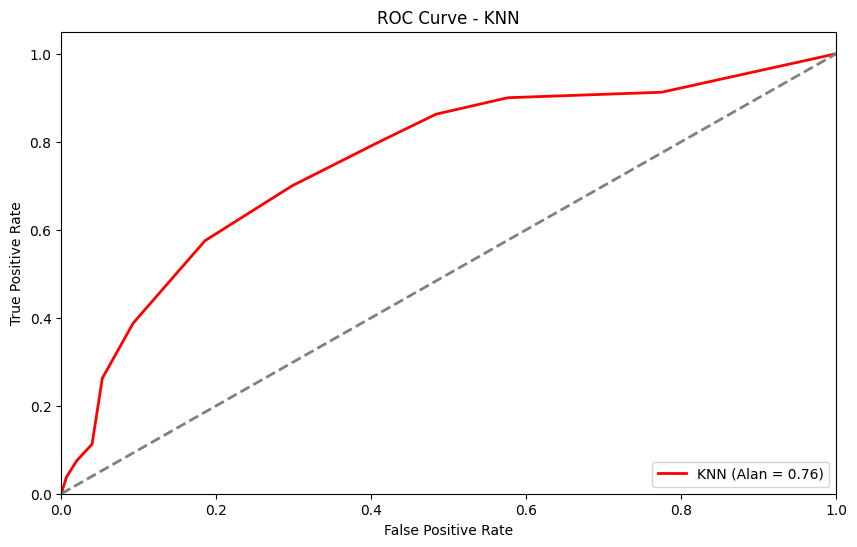

In [12]:
# KNN ROC eğrisi
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='KNN (Alan = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

MLP Sınıflandırıcısının Uygulanması

In [13]:
mlp = MLPClassifier(max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
# Tahmin yapma
y_pred_mlp = mlp.predict(X_test)
y_pred_prob_mlp = mlp.predict_proba(X_test)[:, 1]

Performans Metrikleri ve Karışıklık Matrisi Hesaplama

In [14]:
# Performans metriklerini hesaplama (MLP)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("Confusion Matrix (MLP):")
print(conf_matrix_mlp)

# Sensitivity, Specificity, Accuracy, F1-Score hesaplama (MLP)
tn_mlp, fp_mlp, fn_mlp, tp_mlp = conf_matrix_mlp.ravel()

sensitivity_mlp = tp_mlp / (tp_mlp + fn_mlp)
specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)
accuracy_mlp = (tp_mlp + tn_mlp) / (tp_mlp + tn_mlp + fp_mlp + fn_mlp)
f1_score_mlp = 2 * tp_mlp / (2 * tp_mlp + fp_mlp + fn_mlp)

print(f"Sensitivity (MLP): {sensitivity_mlp}")
print(f"Specificity (MLP): {specificity_mlp}")
print(f"Accuracy (MLP): {accuracy_mlp}")
print(f"F1-Score (MLP): {f1_score_mlp}")


Confusion Matrix (MLP):
[[123  28]
 [ 36  44]]
Sensitivity (MLP): 0.55
Specificity (MLP): 0.8145695364238411
Accuracy (MLP): 0.7229437229437229
F1-Score (MLP): 0.5789473684210527


MLP ROC Eğrisi

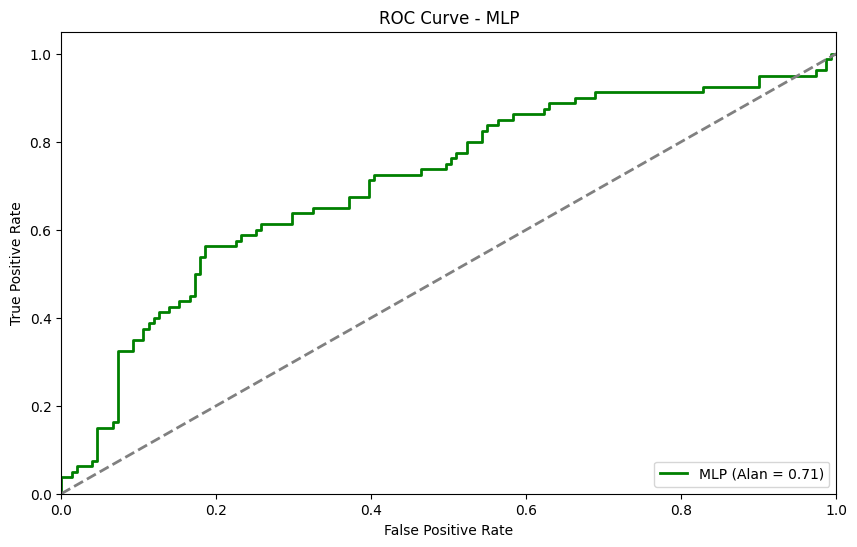

In [15]:
# MLP ROC eğrisi
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_prob_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_pred_prob_mlp)

plt.figure(figsize=(10, 6))
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label='MLP (Alan = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP')
plt.legend(loc="lower right")
plt.show()

SVM Sınıflandırıcısının Uygulanması

In [16]:
# SVM Sınıflandırıcı Uygulama
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
# Tahmin yapma
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

Performans Metrikleri ve Karışıklık Matrisi Hesaplama

In [17]:
# Performans metriklerini hesaplama (SVM)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

# Sensitivity, Specificity, Accuracy, F1-Score hesaplama (SVM)
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm.ravel()

sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)
accuracy_svm = (tp_svm + tn_svm) / (tp_svm + tn_svm + fp_svm + fn_svm)
f1_score_svm = 2 * tp_svm / (2 * tp_svm + fp_svm + fn_svm)

print(f"Sensitivity (SVM): {sensitivity_svm}")
print(f"Specificity (SVM): {specificity_svm}")
print(f"Accuracy (SVM): {accuracy_svm}")
print(f"F1-Score (SVM): {f1_score_svm}")

Confusion Matrix (SVM):
[[131  20]
 [ 41  39]]
Sensitivity (SVM): 0.4875
Specificity (SVM): 0.8675496688741722
Accuracy (SVM): 0.7359307359307359
F1-Score (SVM): 0.5611510791366906


SVM ROC Eğrisi

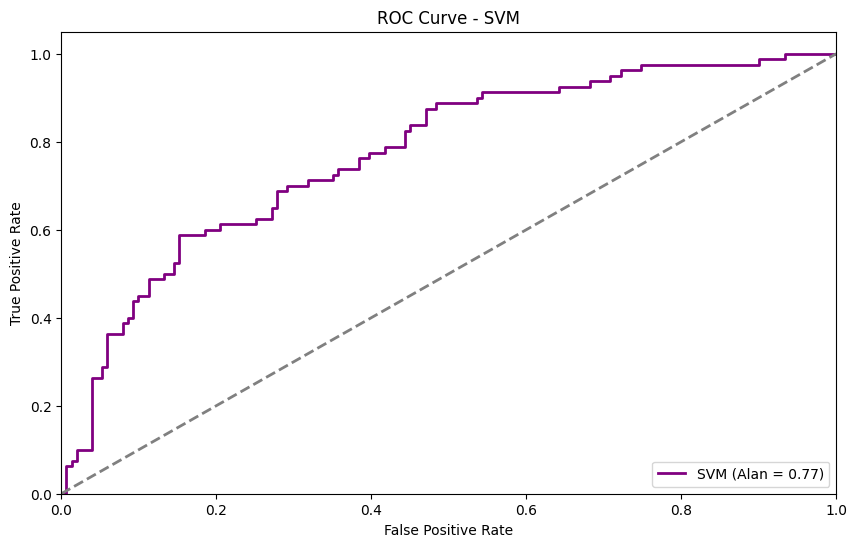

In [18]:
# SVM ROC eğrisi
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='SVM (Alan = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()